<a href="https://colab.research.google.com/github/sanMil2003/APRENDIZAJE_AUTOMATICO_23_24/blob/main/problemaGenetico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo genético

**1.- Encontrar los máximos de la función "picos"**

$$z = f(x,y) = 3(1-x)^2e^{-(x^2)-(y+1)^2}-10(x/5-x^3-y^5)e^{-x^2-y^2}-1/3e^{-(x+1)^2-y^2}$$

En el dominio $$\{x,y\} \in [-100,100]$$

**Cosas con las que jugar:**


*   Mirar si hay superindividuos
*   Cambiar probabilidaes: mutación, seleción y cruce
*   Cambiar tipo de selcección, que no sea por torneo
*   Cambiar tipo de cruce, que no sea un punto
*   Aumentar la población hasta que no veamos mejoras significativas probando con pocas generaciones e ir aumentando el número de individuos
*   Aumentar el número de generaciones y comprobar que el algoritmo converja mostrando una gráfica de convergencia del algoritmo

# **Cosas que se valorarán**

**Tener en cuanta que si haceis comporbaciones de cambio de este modelo, debereís guargar una captura de la tabal y describir porque funciona mejor o peor.**

In [1]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 4.5 MB/s eta 0:00:00


In [2]:
!pip install numpy

In [3]:
!pip install matplotlib

In [4]:
!pip install scipy

In [5]:
!pip install scoop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 kB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scoop: filename=scoop-0.7.2.0-py3-none-any.whl size=78113 sha256=61ae524cdef0e93254347397ae39f22f0f0774fc7f7ff18cc078ae31d53f675e
  Stored in directory: /root/.cache/pip/wheels/26/c6/da/088e4bffcfbc33fa40644ca636267bc801c8fd9eef973483db
Successfully built scoop


In [6]:
import random
import math
import numpy as np
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

Visualizar cuál es la resupuesta correcta

In [7]:
# Importamos la librería
import random
# Fijamos la semilla. Si no cambiamos la semilla,
# la función generará los mismos número aleatorios
random.seed(0)

In [8]:
# Definimos la función objetivo como función prueba
def funcion_prueba(z):
    # x es x[0] e y es x[1]
    x = z[0]
    y = z[1]
    res = 3*(1-x)**2*math.exp(-(x**2)-(y+1)**2)-10*(x/5-x**3-y**5)*math.exp(-x**2-y**2)-1/3*math.exp(-(x+1)**2-y**2) # FO
    return res

In [9]:
# Generamos vectores que barran todo el dominio
# Un vector x que abarca todo el dominio entre -100 y 100, con 1000 puntos equidistantes
x = np.linspace(-100, 100, 1000)
y = np.linspace(-100, 100, 1000)
# print('x= ', x)
# print('y= ', y)

In [10]:
# Evaluamos todos los valores de las variables
# meshgrid --> crea una malla bidimensional a partir de los vectores x e y
x_ax, y_ax = np.meshgrid(x, y)
# combina las coordenadas x e y en la malla en un solo array bidimensional llamado vals
# revel() --> aplanar las matrices bidimensionales
vals = np.c_[x_ax.ravel(), y_ax.ravel()]
# funcion_prueba = función objetivo(FO)
# Esta función evalua la FOen cada punto de la malla vals con coordenadas (x,y)
# Reshape --> reorganiza los resultados de la evaluación en una matriz bidimensional llamamda fx
# con la forma a la lista de valores de la función  en uan matriz bidimensional que corresponde
# a la malla (x_ax, y_ax)
fx = np.reshape([funcion_prueba(val) for val in vals],(1000, 1000))

Text(0.5, 0, 'f(x,y)')

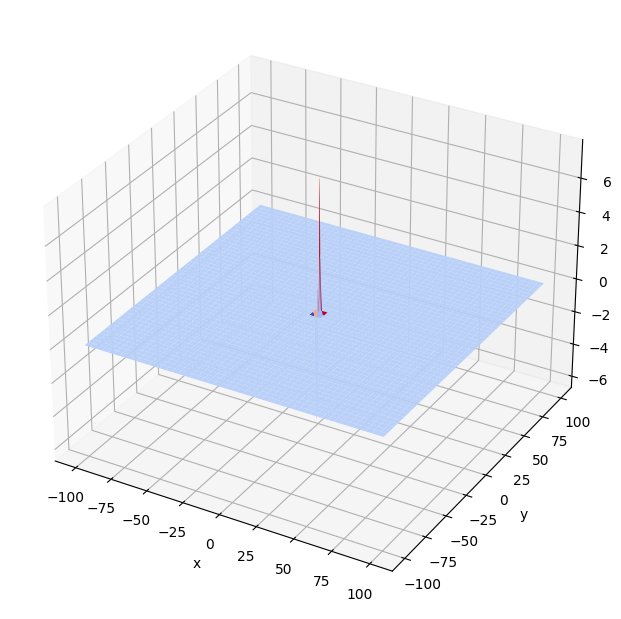

In [11]:
# Representamos los resultados obtenidos
# Para visualizar la función bidimensional que has evaluado
# en la malla de puntos definida anteriormente, se crea una representación 3D
figure_3d = plt.figure(figsize=(8,6))
# ax = figure_3d.gca(projection="3d")
ax = figure_3d.add_axes(Axes3D(figure_3d))
ax.plot_surface(x_ax, y_ax, fx, cmap=cm.coolwarm)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

El máximo alcanzado se dará en 6, y se encuentra en las coordenadas (0,0)

**Hace los juegos del hambre**


In [12]:
import random
from deap import base
from deap import creator
from deap import tools

In [13]:
# Utilizando la función deep se crea un tipo de clase llamado FitnessMax
# base.Fitness --> contiene un atributo llamado wegths
# La clase Fitness proporciona funcionalidades básicas para representar
# la aptitud (fitness) de un individuo en un algoritmo evolutivo
# Especifíca los pesos asociados, a cada objeto se le asigna un peso 1.0 +positivo
# Este peso indica que estamos tratando de maximizar el valor de la función de aptitud.

creator.create("FitnessMax", base.Fitness, weights=(1.0,))

In [14]:
# Crea un nuevo tipo de clase llamado 'Individual'
# Los individuos serán listas
# Especifica que los individuos de esta clase tendrán asociado un objeto de
# tipo "FitnessMax", que has definido previamente. Este objeto de fitness
# determina cómo se evalúa la aptitud (fitness) de un individuo en el contexto
# de un algoritmo evolutivo de maximización.
creator.create("Individual", list, fitness=creator.FitnessMax)

In [15]:
# Crea una instancia de la clase Toolbox en el módulo deap. Un Toolbox es
# una caja de herramientas que se utiliza para organizar los operadores genéticos
# (como selección, cruzamiento, mutación) y otros componentes necesarios
# para ejecutar un algoritmo evolutivo.

toolbox = base.Toolbox()

In [16]:
# Generación de genes (fenotipo dentro del rango)
# toolbox.register(función, aleatorios, restricciones)
toolbox.register("attr_uniform", random.uniform, -100, 100)

In [17]:
# Probamos y vemos que generamos un número leatorio entre -100 y 100 distinto cada vez
toolbox.attr_uniform()

68.88437030500961

In [18]:
# Generación de inviduos
# toolbox.register(función , función n veces, tipo de dato, función que genera, número de repe)
toolbox.register("individual", tools.initRepeat, creator.Individual,
                 toolbox.attr_uniform, 2)

In [19]:
# Ejemplo de la generación de un individuo aleatorio
individuo = toolbox.individual()
individuo

[51.590880588060486, -15.885683833830996]

In [20]:
# Recordar que individuo es una lista que tiene un atributo fitness
# donde se almacena la calidad del mismo, que al principio será
# vacío, porque aun no ha sido evaluado
individuo.fitness.values

()

In [21]:
# Generación de población
# toolbox.register(función , función n veces, tipo de dato, función que genera, número de repe)

toolbox.register("population", tools.initRepeat, list, toolbox.individual, 32)
# toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [22]:
# Ejemplo de creación de una población. Se ve que es
# una lista de 32 listas (una por cada individuo)
poblacion = toolbox.population()
print(poblacion)

[[-48.21664994140733, 2.254944273721705], [-19.01317250991714, 56.75971780695451], [-39.33745478421451, -4.680609169528836], [16.676407891006235, 81.62257703906704], [0.9373711634780477, -43.63243112005924], [51.16084083144477, 23.67379933506632], [-49.898731727511894, 81.94925119364802], [96.55709520753061, 62.04344719931791], [80.43319008791653, -37.970486136133474], [45.96634965202574, 79.7676575935987], [36.79678638308826, -5.571456909457325], [-79.85975838632683, -13.165632909243257], [22.177394688760316, 82.60221064757965], [93.32127355415176, -4.5980446894566], [73.061985554328, -47.90153792160812], [61.005565402604475, 9.739860767117861], [-97.19165996719622, 43.94093728079082], [-20.235291555146247, 64.96899542964661], [33.63064024637018, -99.77143613711435], [-1.284426706935065, 73.52055509855617], [-51.2178246225736, -34.95912745052199], [74.09424642173093, -61.78658169952189], [13.50214812413438, -52.27681427695596], [93.50805005802866, 60.63589385597402], [-10.406085712885

In [23]:
# Cada individuo tiene 2 componentes
poblacion[0]

[-48.21664994140733, 2.254944273721705]

In [24]:
# Está destinada a acceder a los valores de aptitud (fitness) del
# primer individuo en una población. Ahora vacia no se ha creado nada.
poblacion[0].fitness.values

()

In [25]:
# Función objetivo
# Itera sobre todos los elementos de la lista
# Si se encuetra fuera del rango se penaliza con FO = -1
# SI está dentro se calcula el fitnesss o aptitud

# Definimos la función objetivo como función prueba
def funcion_objetivo(z):
    """
    Función objetivo de nuestro problema
    """
    for i in range(len(z)):
        if z[i] > 100 or z[i] < -100:
            return -1,
    x = z[0]
    y = z[1]
    res = 3*(1-x)**2*math.exp(-(x**2)-(y+1)**2)-10*(x/5-x**3-y**5)*math.exp(-x**2-y**2)-1/3*math.exp(-(x+1)**2-y**2) # FO
    return res,

In [26]:
# Función objetivo
# toolbox.register(función, función que utiliza)
toolbox.register("evaluate", funcion_objetivo)

In [27]:
# Ejemplo de uso 1, es coherente si vemos la gráfica anterior todos los valores suelen ser 0
funcion_objetivo(individuo)

(0.0,)

In [28]:
# Ejemplo de uso 2
toolbox.evaluate(individuo)

(0.0,)

In [29]:
# Registrar la operación gnética de cruce por un punto
# toolbox.register(función, función tipo de cruce)
toolbox.register("mate", tools.cxOnePoint)

In [30]:
# Registra la operación gnética de mutación
# Distribución normal
# mu = 0 --> media
# sigma = 5 --> desviación estándar
# indpb = 0.1 --> probabilidad de mutar el gen de un individuo (cntrol de cuantos se mutan)
# Si la prob generada es menor de 0.1 se muta (10%)
# toolbox.register(función, distribución, media, desviación, prob.mutación)

toolbox.register("mutate", tools.mutGaussian, mu=0,
                 sigma= 5, indpb=0.1)

In [31]:
# Selección mediante torneo
# La selección de individuos es con remplazo
# toolbox.register(función, tipo de selección (torneo), cantidad de individuos en el torneo)

toolbox.register("select", tools.selTournament, tournsize=3)

In [32]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares
CXPB, MUTPB, NGEN = 0.5, 0.2, 20

In [34]:
#Generamos la Población Inicial
# pop = toolbox.population()
pop = toolbox.population()
pop

[[-23.019770805467914, 15.130202832977702],
 [-41.934099519448395, -62.121734289128774],
 [-62.654094348888975, 22.554635973721332],
 [31.331877797925756, -4.693801598123855],
 [-82.03512776088127, 51.52078439328736],
 [75.35407416455496, 84.67620318925611],
 [68.4920446280365, 79.6346242715758],
 [84.61648796403537, 8.119984989610884],
 [-21.740789953075023, 41.05667997088125],
 [-44.87317573757457, 62.32574170157571],
 [69.89719303727341, 79.00779348533504],
 [17.960236706231967, 89.95297464642411],
 [15.93900214912118, -9.887378673768964],
 [32.0490757244778, 99.25156787071455],
 [83.38824358949122, 58.66501682604485],
 [-83.52540236067051, 22.556621008142443],
 [-2.711159606166632, 26.029468082294557],
 [69.01551513430303, -51.39287558762875],
 [46.29784415816957, -76.5731413582964],
 [-55.9078926264343, 58.91659434211519],
 [-33.4927701560689, 63.18261930673191],
 [-79.87849595678077, -70.72830221753924],
 [39.53412803824776, -90.95318642687752],
 [14.773207357833385, 82.003202939

In [35]:
# Definimos el objeto hof que almacenará el mejor individuo
# encontrado a lo largo de las generaciones del Algoritmo G.
# En una instancia llamada 'HallOfFame'
# maxsize = 1 --> solo almacenará al mejor individuo
# No reemplaza si son iguales

hof = tools.HallOfFame(1)
hof

In [36]:
print(hof)

[]


In [37]:
# Definimos un objeto para generar(recopila y almacena datos) las estadísticas de la
# población a lo largo de las generaciones del algoritmo
# lambda --> toma un individuo ind y muestra su valor en FO
stats = tools.Statistics(lambda ind: ind.fitness.values)
print(stats)

In [38]:
# Cada línea de código registra una estadística particular con su
# correspondiente función para calcular dicha estadística.
stats.register("avg", np.mean) # --> media
stats.register("std", np.std)  # --> desviación
stats.register("min", np.min)  # --> mínimo
stats.register("max", np.max)  # --> máximo

In [39]:
# loogbook contendrá todo el registro de evolución
logbook = tools.Logbook()

In [40]:
# Definimos:
#  CXPB: Probabilidad de Cruce
#  MUTPB: Probabilidad de Mutación
#  NGEN: Número de Generaciones
# Los valores son de prueba para obtener unos resultados preeliminares
# CXPB, MUTPB, NGEN = 0.5, 0.2, 20
# Difreencia entre MUTPB e indpb es:
# MUTPB --> Este parámetro controla la probabilidad global de que un individuo
# en la población experimente una operación de mutación en cada generación
# ... Tantos individuos serán mutados
# indpb --> Contexto específico de la operación de mutación de un individuo
# ... Dentro del genotipo la probabilida de que un gen se mute
# pop --> población de individuos en la cual se ejecutará el algoritmo
# verbose --> comenta las jugadas del algoritmo
# eaSimple --> algoritmo evolutivo simple
# logbook -->  info detallada sobre el progreso del algoritmo evolutivo a lo largo de las generaciones

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=CXPB,
                                       mutpb=MUTPB, ngen=NGEN, stats=stats,
                                       halloffame=hof, verbose=True)

gen	nevals	avg         	std         	min          	max         
0  	32    	4.83452e-144	2.69175e-143	-3.36022e-311	1.54705e-142
1  	19    	9.89201e-99 	5.50764e-98 	0            	3.16544e-97 
2  	25    	4.12783e-38 	2.29828e-37 	0            	1.32091e-36 
3  	26    	2.4767e-37  	5.15566e-37 	0            	1.32091e-36 
4  	24    	5.77896e-37 	6.55273e-37 	0            	1.32091e-36 
5  	21    	1.15579e-36 	4.36849e-37 	3.16544e-97  	1.32091e-36 
6  	18    	1.27982e-36 	2.28743e-37 	6.23455e-39  	1.32091e-36 
7  	24    	1.28095e-36 	2.22437e-37 	4.24756e-38  	1.32091e-36 
8  	17    	3.48255e-35 	1.8702e-34  	1.77762e-67  	1.07611e-33 
9  	15    	3.48667e-35 	1.87013e-34 	2.83089e-112 	1.07611e-33 
10 	17    	3.6835e-11  	2.05088e-10 	1.32091e-36  	1.17872e-09 
11 	13    	1.10505e-10 	3.43574e-10 	1.32091e-36  	1.17872e-09 
12 	14    	2.9468e-10  	5.104e-10   	4.66372e-42  	1.17872e-09 
13 	14    	6.5222e-10  	5.78265e-10 	1.97817e-115 	1.17872e-09 
14 	19    	1.0574e-09  	3.45362e-10 	1.3

In [42]:
print("Mejor fitness: %f" %hof[0].fitness.values)
print("Mejor individuo %s" %hof[0])

Mejor fitness: 0.000112
Mejor individuo [-1.5166558899466775, 4.004485741248084]
